# **1. Almacenar la información**

Importo y guardo la información obtenida 

In [1]:
import pandas as pd
data = 'C:\\Users\\Fukushima\\Documents\\GitHub\\ProyectoFinalVV\\data\\raw\\book1-100k.csv'
df = pd.read_csv(data, on_bad_lines='skip')
df.head(10)

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848
5,6,Harry Potter and the Goblet of Fire (Harry Pot...,1:9419,734,4:606800,total:2431085,28,9,Scholastic,31978,2002,eng,J.K. Rowling,4.56,2:24282,5:1612165,NaN,3:178419
6,8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",1:402,2690,4:4650,total:43968,13,9,Scholastic,166,2004,eng,J.K. Rowling,4.78,2:283,5:37432,0439682584,3:1201
7,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",1:0,152,4:7,total:28,26,4,Nimble Books,1,2005,en-US,W. Frederick Zimmerman,3.79,2:5,5:10,0976540606,3:6
8,10,"Harry Potter Collection (Harry Potter, #1-6)",1:257,3342,4:4358,total:30313,12,9,Scholastic,809,2005,eng,J.K. Rowling,4.73,2:218,5:24406,0439827604,3:1074
9,12,The Ultimate Hitchhiker's Guide: Five Complete...,1:3443,815,4:75683,total:274268,1,11,Gramercy Books,255,2005,eng,Douglas Adams,4.37,2:7613,5:157499,0517226952,3:30030


Guardo los datos obtenidos en un DB de SQL

In [2]:
import pandas as pd
from sqlalchemy import create_engine

data = 'C:\\Users\\Fukushima\\Documents\\GitHub\\ProyectoFinalVV\\data\\raw\\book1-100k.csv'
tabla = 'Libros'
ruta_base_datos = '../data/raw/books.db'
df = pd.read_csv(data, on_bad_lines='skip')
engine = create_engine(f'sqlite:///{ruta_base_datos}')
df.to_sql(tabla, engine, index=False, if_exists='replace')

# Confirmar y cerrar la conexión
engine.dispose()

In [3]:
import sqlite3

conexion = sqlite3.connect('C:\\Users\\Fukushima\\Documents\\GitHub\\ProyectoFinalVV\\data\\raw\\books.db')
cursor = conexion.cursor()

query_select = "SELECT * FROM Libros LIMIT 10;"
cursor.execute(query_select)
resultados_select = cursor.fetchall()
print("Consulta SELECT:")
for resultado in resultados_select:
    print(resultado)

conexion.commit()
conexion.close()

Consulta SELECT:
(1, 'Harry Potter and the Half-Blood Prince (Harry Potter, #6)', '1:9896', 652, '4:556485', 'total:2298124', 16, 9, 'Scholastic Inc.', 28062, 2006, 'eng', 'J.K. Rowling', 4.57, '2:25317', '5:1546466', None, '3:159960')
(2, 'Harry Potter and the Order of the Phoenix (Harry Potter, #5)', '1:12455', 870, '4:604283', 'total:2358637', 1, 9, 'Scholastic Inc.', 29770, 2004, 'eng', 'J.K. Rowling', 4.5, '2:37005', '5:1493113', '0439358078', '3:211781')
(3, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)", '1:108202', 309, '4:1513191', 'total:6587388', 1, 11, 'Scholastic Inc', 75911, 2003, 'eng', 'J.K. Rowling', 4.47, '2:130310', '5:4268227', None, '3:567458')
(4, 'Harry Potter and the Chamber of Secrets (Harry Potter, #2)', '1:11896', 352, '4:706082', 'total:2560657', 1, 11, 'Scholastic', 244, 2003, 'eng', 'J.K. Rowling', 4.42, '2:49353', '5:1504505', '0439554896', '3:288821')
(5, 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)', '1:10128', 435, '4:630534

In [4]:
df.shape

(58292, 18)

In [5]:
df.duplicated().sum()

np.int64(112)

In [6]:
df.isna().sum()

Id                     0
Name                   0
RatingDist1            0
pagesNumber            0
RatingDist4            0
RatingDistTotal        0
PublishMonth           0
PublishDay             0
Publisher            494
CountsOfReview         0
PublishYear            0
Language           37998
Authors                0
Rating                 0
RatingDist2            0
RatingDist5            0
ISBN                 546
RatingDist3            0
dtype: int64

No existen valores nulos


<Axes: >

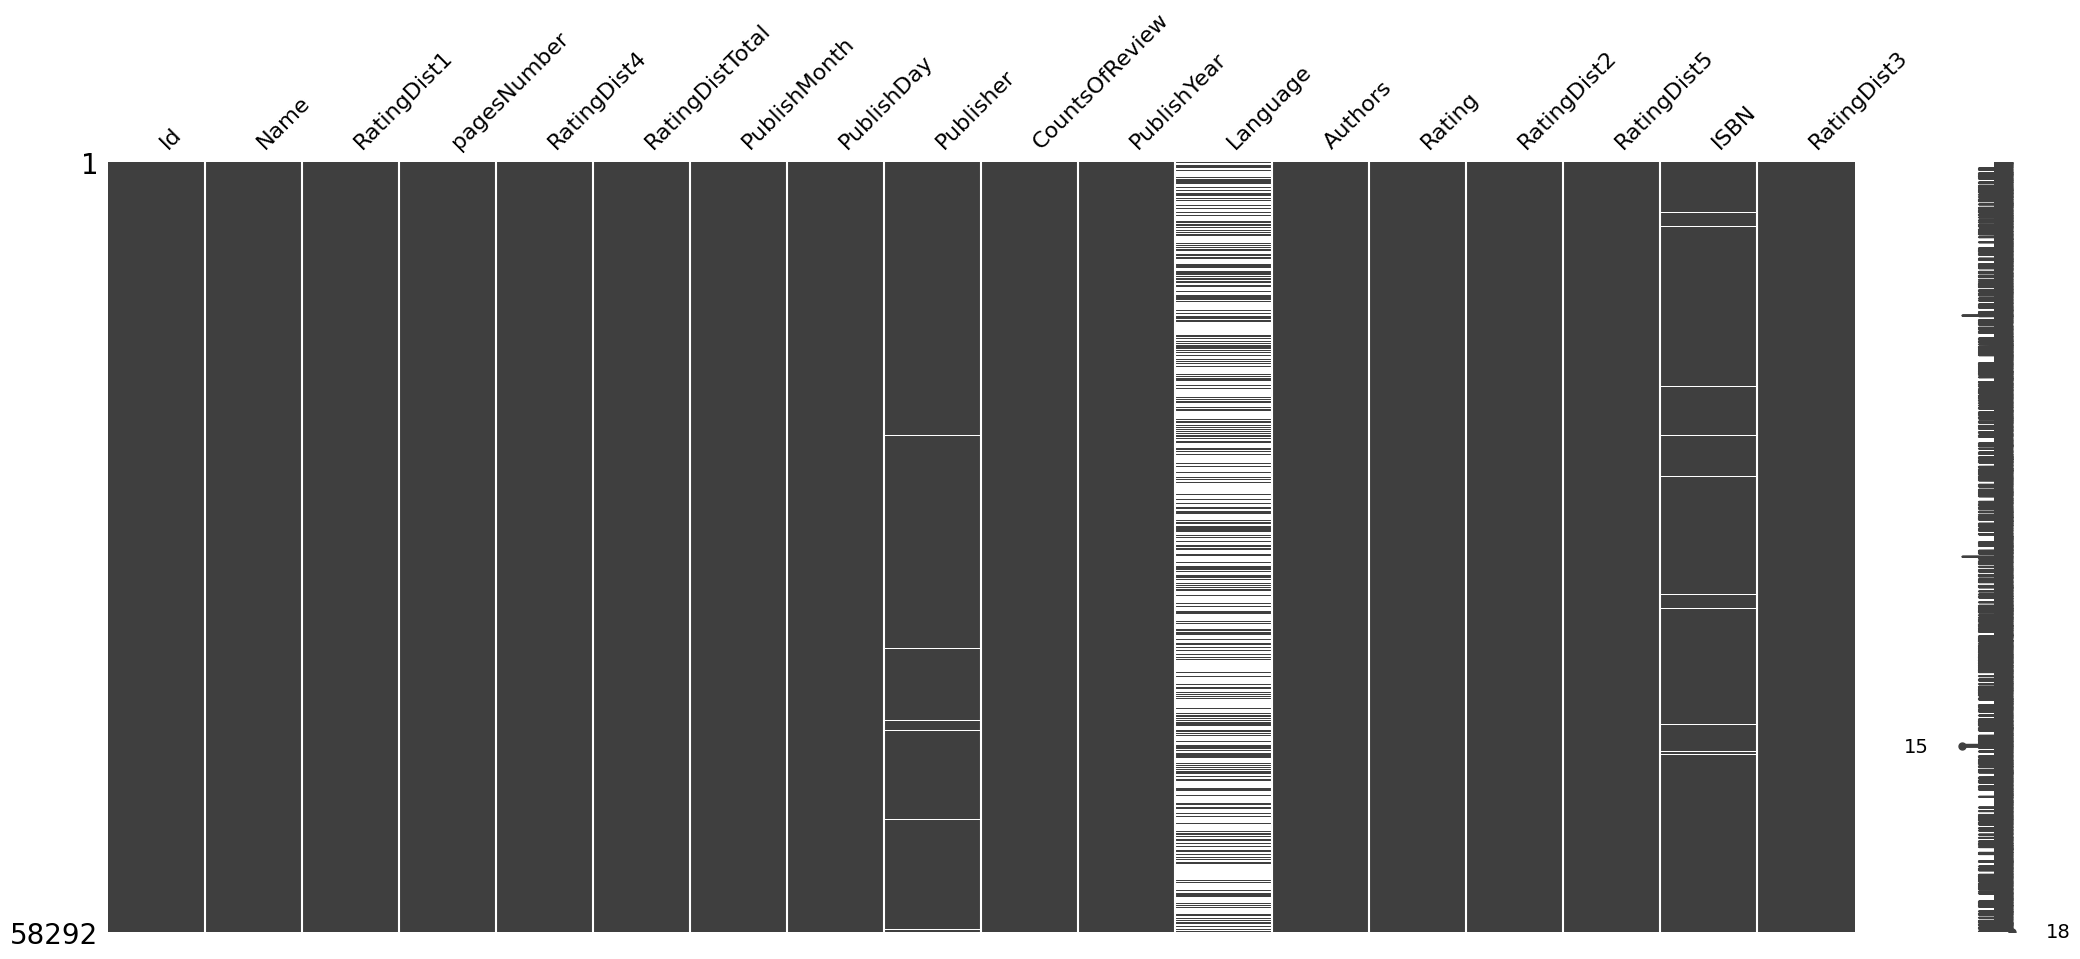

In [7]:
import missingno as msno

msno.matrix(df)

Esta gráfica demuestra que tengo valores nulos en editor/a, lenguaje y el ISBN, pero son datos que al momento de hacer el eda los eliminaré porque no me son utiles para lo que quiero hacer